## EDA PROYECTO INDIVIDUAL

Caragamos el archivo final del ETL movie_final con el metodo info analizamos si hay null y de que tipo de datos son nuestros campos

In [22]:
import pandas as pd

df = pd.read_csv("movie_final.csv")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41948 entries, 0 to 41947
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  5462 non-null   object 
 1   budget                 41948 non-null  int64  
 2   genres                 41948 non-null  object 
 3   id                     41948 non-null  int64  
 4   original_language      41933 non-null  object 
 5   overview               41685 non-null  object 
 6   popularity             41948 non-null  float64
 7   production_companies   41948 non-null  object 
 8   production_countries   41948 non-null  object 
 9   release_date           41948 non-null  object 
 10  revenue                41948 non-null  float64
 11  runtime                41885 non-null  float64
 12  spoken_languages       41948 non-null  object 
 13  status                 41937 non-null  object 
 14  tagline                22687 non-null  object 
 15  ti

Verificamos con el metodo describe cuales columnas son numericas y analizamos ciertas estadisticas de nuestros campos

In [60]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.194800e+04,41948.000000,41948.000000,4.194800e+04,41885.000000,41948.000000,41948.000000,41948.000000,41948.00000
mean,1.390044e+07,79950.857300,5.593333,3.294962e+07,108.520664,5.913860,318.609111,1999.337966,inf
std,3.161308e+07,106094.275631,8.971626,1.098014e+08,31.622418,1.462672,874.209598,17.122504,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1883.000000,0.00000
25%,0.000000e+00,10046.750000,0.958683,0.000000e+00,93.000000,5.300000,7.000000,1995.000000,0.00000
50%,0.000000e+00,34449.000000,3.396183,0.000000e+00,105.000000,6.200000,33.000000,2004.000000,0.00000
75%,1.200000e+07,92647.000000,8.220235,6.937252e+06,122.000000,6.900000,186.000000,2010.000000,1.03019
max,3.800000e+08,469172.000000,294.337037,2.787965e+09,931.000000,10.000000,14075.000000,2020.000000,inf


Podemos observar que columnas no son numericas 

In [61]:
# Seleccionar las columnas no numéricas
columnas_no_numericas = df.select_dtypes(exclude=["number"]).columns

# Imprimir las columnas no numéricas
print(columnas_no_numericas)

Index(['belongs_to_collection', 'genres', 'original_language', 'overview',
       'production_companies', 'production_countries', 'release_date',
       'spoken_languages', 'status', 'tagline', 'title', 'collection', 'genre',
       'company', 'country', 'language'],
      dtype='object')


El gráfico me  muestra la distribución de los valores de las variables "budget" y "vote_average" en un histograma. Me permite visualizar cómo se distribuyen los presupuestos y las calificaciones promedio de las películas en el conjunto de datos. El análisis del histograma me permite  información sobre la concentración de valores en diferentes rangos y poder observar patrones, tendencias o anomalías en los datos. 

<Axes: >

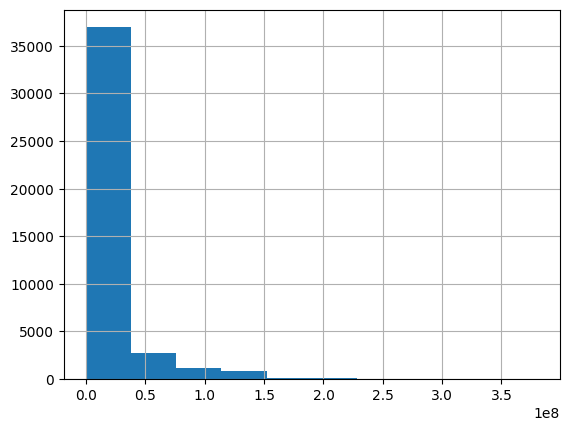

In [24]:
import matplotlib.pyplot as plt

df["budget"].hist()
df["vote_average"].hist()


In [62]:
for col in df.columns:
    if df[col].dtype != 'object':  # Verifica si la columna es numérica
        if df[col].isnull().any():
            print(f"The column {col} has {df[col].isnull().sum()} missing values.")

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        outliers = df[col].loc[(df[col] > upper_bound) | (df[col] < lower_bound)]
        print(f"The column {col} has {outliers.shape[0]} outliers.")


The column budget has 5625 outliers.
The column id has 5912 outliers.
The column popularity has 990 outliers.
The column revenue has 8603 outliers.
The column runtime has 63 missing values.
The column runtime has 1942 outliers.
The column vote_average has 1208 outliers.
The column vote_count has 6314 outliers.
The column release_year has 3992 outliers.
The column return has 6850 outliers.


Al analizar los resultados obtenidos en el análisis exploratorio de datos, podemos observar lo siguiente:

La columna "budget" tiene 5625 outliers, lo que indica que hay un número significativo de películas con presupuestos inusualmente altos o bajos en comparación con el resto de los datos.

La columna "id" tiene 5912 outliers, lo que sugiere que hay ciertos identificadores de películas que están fuera del rango normal.

La columna "popularity" tiene 990 outliers, lo que indica que algunas películas tienen niveles de popularidad excepcionalmente altos o bajos.

La columna "revenue" tiene 8603 outliers, lo que sugiere que hay películas con ingresos atípicamente altos o bajos.

La columna "runtime" tiene 63 valores faltantes y 1942 outliers, lo que podría indicar que algunas películas tienen duraciones inusuales.

La columna "vote_average" tiene 1208 outliers, lo que sugiere que hay calificaciones de películas que están fuera del rango normal.

La columna "vote_count" tiene 6314 outliers, lo que podría indicar que algunas películas tienen un número inusualmente alto o bajo de votos.

La columna "release_year" tiene 3992 outliers, lo que indica que hay años de lanzamiento que están fuera del rango normal.

La columna "return" tiene 6850 outliers, lo que sugiere que algunas películas tienen un retorno de inversión excepcionalmente alto o bajo.

En el gráfico de dispersión se muestra la relación entre el presupuesto de una película y su calificación promedio. Cada punto representa una película y nos permite visualizar si existe alguna tendencia entre un mayor presupuesto y una calificación más alta. Esto nos ayuda a entender si el dinero invertido en la producción de una película tiene algún impacto en la opinión de los espectadores.

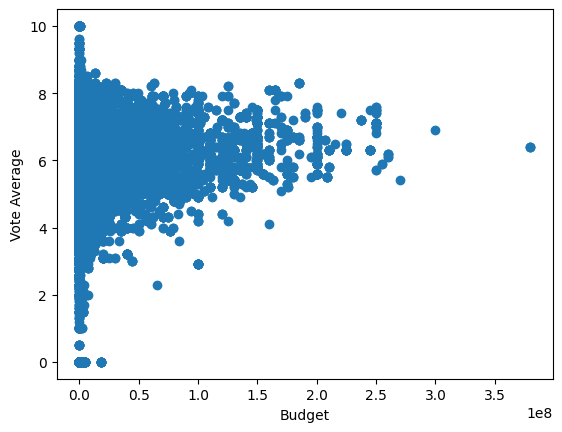

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df["budget"], df["vote_average"])
plt.xlabel("Budget")
plt.ylabel("Vote Average")
plt.show()


En el contexto en un sistema de recomendación de películas basado en aprendizaje automático (ML), el gráfico de dispersión entre el presupuesto y la calificación promedio nos ayuda a explorar si existe alguna relación entre estos dos atributos en el conjunto de datos de películas. Si se observa una tendencia positiva, es decir, a medida que aumenta el presupuesto, la calificación promedio también tiende a ser más alta, esto podría indicar que las películas con mayores presupuestos tienden a recibir mejores calificaciones. Esto podría ser útil para el sistema de recomendación, ya que podría considerar el presupuesto como uno de los factores para seleccionar películas similares o recomendaciones basadas en la calificación promedio.

["assassin's", 'creed', 'the', 'danish', 'girl', 'hanna', 'blackthorn', "matthew's", 'days', 'ghost', 'of', 'love', 'anzio', 'a', 'single', 'shot', 'only', 'god', 'forgives', 'eddie', 'the', 'eagle', 'persepolis', 'sinbad', 'and', 'the', 'eye', 'of', 'the', 'tiger', 'the', 'portrait', 'of', 'a', 'lady', 'direct', 'action', 'guardian', "carlito's", 'way', 'city', 'hunter', 'saving', 'mr.', 'banks', 'some', 'girl', 'force', 'majeure', 'breakout', 'underworld:', 'rise', 'of', 'the', 'lycans', 'g.i.', 'joe:', 'the', 'rise', 'of', 'cobra', 'enemy', 'angel', 'diamonds', 'are', 'forever', 'the', 'confession', 'mission', 'london', 'the', 'sisterhood', 'of', 'night', 'night', 'hair', 'child', 'now', 'you', 'see', 'me', 'my', 'name', 'is', 'juani', 'black', 'orpheus', 'children', 'of', 'the', 'corn', 'playing', 'cards', 'visions', 'of', 'europe', 'in', 'darkness', 'flame', '&', 'citron', 'up', 'in', 'arms', 'visions', 'of', 'europe', 'rise', 'of', 'the', 'gargoyles', 'centurion', 'all', 'about',

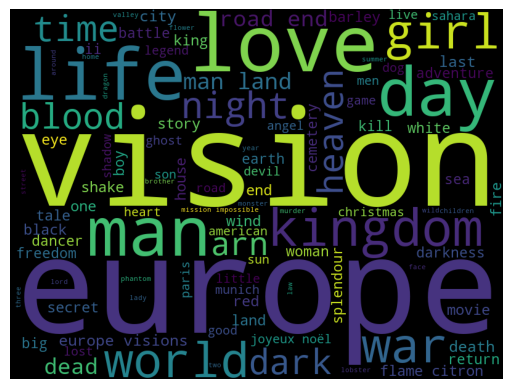

In [31]:
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt

df = pd.read_csv("movie_final.csv")

titles = df["title"].str.lower()
words = titles.str.split().sum()
print(words)  # Imprimir la lista de palabras

wordcloud = wordcloud.WordCloud(width=800, height=600, max_words=100).generate(" ".join(words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


Este código genera una imagen llamada "nube de palabras" a partir de los títulos de las películas. La nube de palabras muestra las palabras más frecuentes en los títulos en un tamaño mayor y de manera visualmente atractiva. Me ayuda a identificar rápidamente las palabras clave y los temas más comunes en las películas de mi conjunto de datos sin necesidad de leer todos los títulos individualmente.

In [63]:
if "title" in df.columns:
    titles = df["title"]
    print(titles)
else:
    print("No se encontró la columna 'title' en el DataFrame.")


0              Assassin's Creed
1               The Danish Girl
2                         Hanna
3                    Blackthorn
4                Matthew's Days
                  ...          
41943    The Godfather: Part II
41944                      10.5
41945                  The Rite
41946           The Swissmakers
41947       The End of Violence
Name: title, Length: 41948, dtype: object


## MODELO MACHINE LEARNING

In [59]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def recommendation(title):
    if title not in df["title"].values:
        raise KeyError(f"The movie '{title}' is not present in the dataset.")
    
    title_index = df[df["title"] == title].index[0]
    distances, indices = model.kneighbors([df.loc[title_index, ["budget", "vote_average"]]])

    recommended_titles = []
    i = 0
    while len(recommended_titles) < 5 and i < len(indices[0]):
        index = indices[0, i]
        recommended_title = df.loc[index, "title"]
        if recommended_title != title and recommended_title not in recommended_titles:
            recommended_titles.append(recommended_title)
        i += 1
    
    if len(recommended_titles) < 5:
        remaining_indices = df.index[~df.index.isin(indices[0])]
        remaining_titles = df.loc[remaining_indices, "title"].sample(n=5-len(recommended_titles), random_state=42)
        recommended_titles.extend(remaining_titles)
    
    return recommended_titles

df = pd.read_csv("movie_final.csv")
model = NearestNeighbors(n_neighbors=50)  # Aumentamos el número de vecinos a considerar
model.fit(df[["budget", "vote_average"]])

print(recommendation("The Godfather: Part II"))


['The Intouchables', 'Human', 'A Prophet', 'The Girl with the Dragon Tattoo', 'The Conjuring']


c:\Users\Juan Manuel\Documents\PROYECTO INDIVIDUAL MOVIES\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Este Modelo de machine learning implementa un sistema de recomendación de películas utilizando el algoritmo de vecinos más cercanos (Nearest Neighbors) de la biblioteca scikit-learn. El modelo busca películas similares basándose en las características de presupuesto (budget) y calificación promedio de votos (vote_average).

El modelo de vecinos más cercanos es adecuado para un sistema de recomendación de películas porque busca películas similares en función de su proximidad en el espacio de características. En este caso, el espacio de características está definido por el presupuesto y la calificación promedio de votos. Al considerar estas dos características, el modelo puede encontrar películas que son financieramente similares y tienen una calificación promedio similar.

Elegimos el presupuesto y la calificación promedio de votos como características objetivo porque representan aspectos importantes para la recomendación de películas. El presupuesto puede ser un indicador de la producción y el alcance de una película, mientras que la calificación promedio de votos puede reflejar la aceptación y el agrado general del público. Al combinar estas dos características, podemos obtener recomendaciones que tengan similitudes tanto en términos de recursos financieros como de satisfacción del público.

En el ejemplo dado, se proporciona el título "The Godfather: Part II" y se devuelve una lista de 5 recomendaciones de películas similares. El modelo calcula la distancia entre las características del título de entrada y las demás películas en el conjunto de datos. Luego, se seleccionan las películas más cercanas en función de su distancia y se devuelven como recomendaciones. 